In [1]:
>>> import numpy as np
>>> from hmmlearn import hmm
>>> np.random.seed(42)
>>>
>>> model = hmm.GaussianHMM(n_components=3, covariance_type="full")
>>> model.startprob_ = np.array([0.6, 0.3, 0.1])
>>> model.transmat_ = np.array([[0.7, 0.2, 0.1],
...                             [0.3, 0.5, 0.2],
...                             [0.3, 0.3, 0.4]])
>>> model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
>>> model.covars_ = np.tile(np.identity(2), (3, 1, 1))
>>> X, Z = model.sample(100)


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
X.shape, Z.shape

((100, 2), (100,))

In [4]:
X[:10,:]

array([[-1.11188012,  0.31890218],
       [ 1.57921282,  0.76743473],
       [-0.58087813, -0.52516981],
       [ 0.24196227, -1.91328024],
       [ 0.81644508, -1.523876  ],
       [-0.90802408, -1.4123037 ],
       [-0.62947496,  0.59772047],
       [-0.54438272,  0.11092259],
       [-0.60025385,  0.94743982],
       [-0.60170661,  1.85227818]])

In [5]:
Z[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

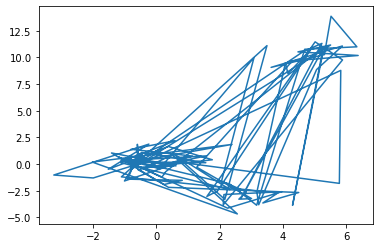

In [6]:
plt.plot(X[:,0], X[:,1])

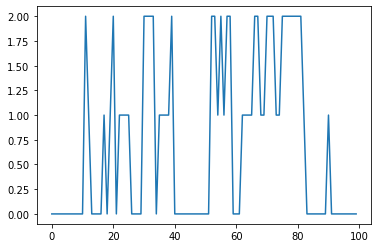

In [7]:
plt.plot(Z)

In [8]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
>>> model.startprob_ = np.array([0.6, 0.3, 0.1])
>>> model.transmat_ = np.array([[0.7, 0.2, 0.1],
...                             [0.3, 0.5, 0.2],
...                             [0.3, 0.3, 0.4]])

>>> model.means_ = np.array([[0], [3.], [6.]])
>>> model.covars_ = np.tile(np.identity(1), (3, 1, 1))
>>> X, Z = model.sample(100)



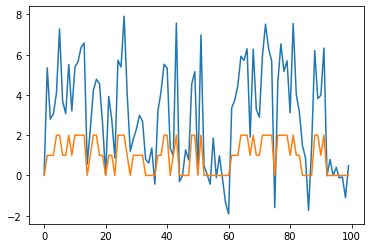

In [9]:
plt.plot(X)
plt.plot(Z)

In [10]:
re_model = hmm.GaussianHMM(n_components=2, covariance_type='full', n_iter=100)
re_model.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [11]:
Z = re_model.predict(X)

In [12]:
Z

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
re_model.means_

array([[4.6372783 ],
       [0.30569802]])

In [14]:
re_model.covars_

array([[[2.85073344]],

       [[0.9973446 ]]])

In [15]:
X_re, Z_re = re_model.sample(100)

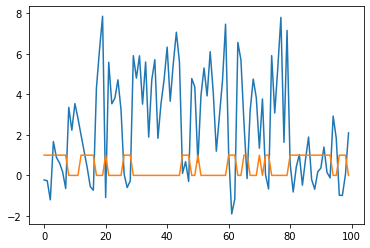

In [16]:
plt.plot(X_re)
plt.plot(Z_re)

In [17]:
dat_path = "DCAS.VN.EXT08.DAT"

with open(dat_path) as f:
    lines = f.readlines()
    
mat = [line.strip().split("|") for line in lines]
death_date = [row[34] for row in mat]

from datetime import date, timedelta

start_date = date(1961, 1, 1)
end_date = date(1975, 4, 30)
delta = timedelta(days=1)

t = start_date
i=0

date_list = []
date2idx = {}
while t <= end_date:
    s = t.strftime("%Y%m%d")
    date_list.append(s)
    date2idx[s] = i
    
    i += 1
    t += delta
    
death_count = [0 for i in range(len(date_list))]

for ts in death_date:
    if ts not in date2idx:
        print("Skip {}".format(ts))
        continue
    death_count[date2idx[ts]] += 1
    


Skip 19600217
Skip 19750515
Skip 19750513
Skip 19750515
Skip 19750515
Skip 19590708
Skip 19750513
Skip 19750515
Skip 19750513
Skip 19571021
Skip 19750502
Skip 19750513
Skip 19560608
Skip 19600221
Skip 19750513
Skip 19750513
Skip 19750513
Skip 19750515
Skip 19750515
Skip 19750513
Skip 20040924
Skip 19750515
Skip 19750513
Skip 19750513
Skip 19870924
Skip 19750515
Skip 19750513
Skip 19750513
Skip 19750515
Skip 19750513
Skip 19750513
Skip 19750513
Skip 19750515
Skip 19750515
Skip 19750515
Skip 20060528
Skip 19750513
Skip 19750515
Skip 19750513
Skip 19750513
Skip 19750513
Skip 19600217
Skip 20060105
Skip 19750513
Skip 19600217
Skip 19590708
Skip 20050228
Skip 19750513
Skip 19750515
Skip 19901114
Skip 19750513
Skip 19750515
Skip 19750515
Skip 19600831
Skip 20050330
Skip 19750515
Skip 19750515
Skip 19750513


In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

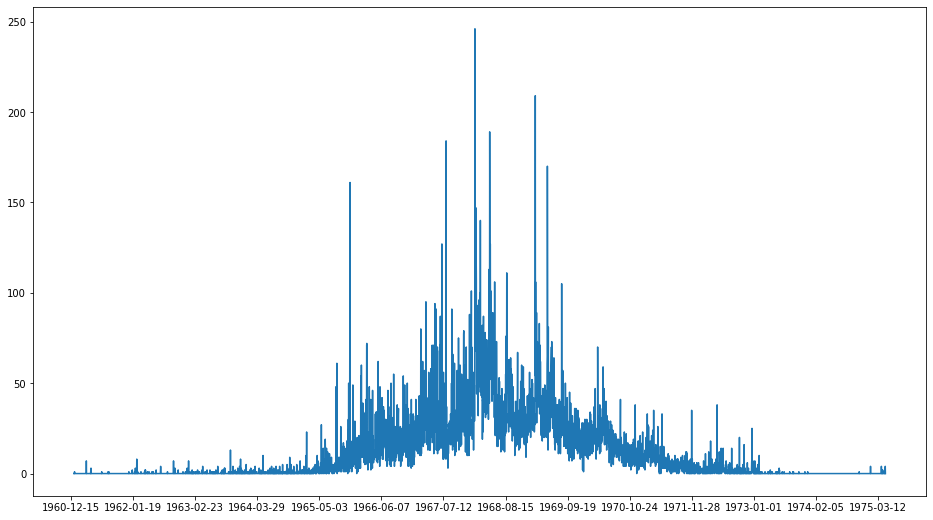

In [35]:
plt.figure(figsize=(16,9))
x = mdates.drange(start_date, end_date + delta, delta)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.plot(x, death_count)
plt.savefig("death_count.svg")

In [20]:
death_arr = np.array(death_count)

In [21]:
death_arr.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [4],
       [0]])

In [22]:
model_vietnam = hmm.GaussianHMM(n_components=5, covariance_type='full', n_iter=100)
model_vietnam.fit(death_arr.reshape(-1,1))

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [23]:
X_v, Z_v = model_vietnam.sample(1000)

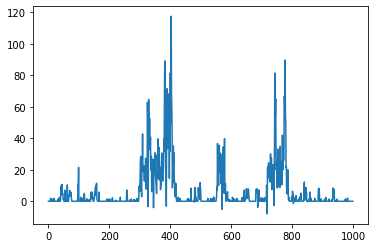

In [24]:
plt.plot(X_v)

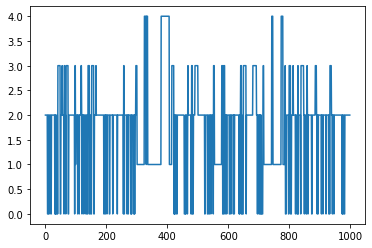

In [25]:
plt.plot(Z_v)

In [26]:
model_vietnam.means_

array([[ 1.46123764],
       [19.75641303],
       [ 0.        ],
       [ 5.75783223],
       [48.76360042]])

In [27]:
model_vietnam.covars_

array([[[4.41927156e-01]],

       [[8.46599683e+01]],

       [[4.38142801e-06]],

       [[1.06026032e+01]],

       [[6.96225959e+02]]])

In [28]:
model_vietnam2 = hmm.GaussianHMM(n_components=10, covariance_type='full', n_iter=100)
model_vietnam2.fit(death_arr.reshape(-1,1))

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=10, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [42]:
X_v, Z_v = model_vietnam2.sample(1000)

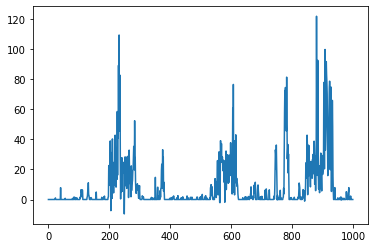

In [30]:
plt.plot(X_v)

In [31]:
model_vietnam.score(death_arr.reshape(-1,1))

255.9905781429814

In [32]:
model_vietnam2.score(death_arr.reshape(-1,1))

796.2942554492404

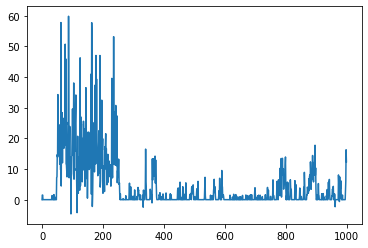

In [43]:
X_v, Z_v = model_vietnam2.sample(1000)

plt.plot(X_v)

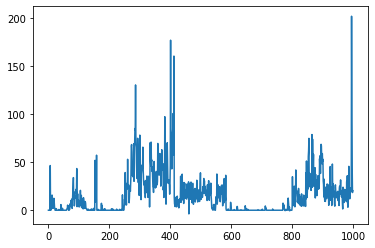

In [44]:
X_v, Z_v = model_vietnam2.sample(1000)

plt.plot(X_v)

In [37]:
model_vietnam2.means_

array([[  0.        ],
       [  9.24303254],
       [ 36.7157555 ],
       [  1.20977677],
       [ 74.89809896],
       [  3.73384785],
       [ 27.86060102],
       [ 48.9088217 ],
       [191.47658562],
       [ 17.30672783]])

In [38]:
model_vietnam2.covars_

array([[[4.38116909e-06]],

       [[2.00338259e+01]],

       [[2.09868125e+02]],

       [[1.66244621e-01]],

       [[6.42899852e+02]],

       [[3.80404037e+00]],

       [[8.67747358e+01]],

       [[3.19486276e+02]],

       [[8.77597933e+02]],

       [[5.20148536e+01]]])

In [39]:
model_vietnam2.startprob_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
model_vietnam2.transmat_

array([[8.52927077e-001, 3.69496233e-003, 5.23297021e-004,
        1.02769479e-001, 0.00000000e+000, 4.00851846e-002,
        8.20483693e-130, 3.47722166e-317, 0.00000000e+000,
        1.04346472e-047],
       [1.76918727e-002, 8.55292116e-001, 5.23442315e-002,
        1.54291486e-017, 1.04924933e-137, 7.13392315e-002,
        9.33813973e-056, 1.07810681e-101, 6.62733373e-045,
        3.33254842e-003],
       [1.60336907e-002, 2.61019377e-001, 5.34575693e-002,
        3.41356267e-002, 1.96617079e-061, 3.98714847e-002,
        1.39455157e-006, 2.07316573e-013, 1.38950619e-019,
        5.95480857e-001],
       [5.68539352e-001, 1.40939754e-002, 1.08292069e-013,
        2.37548148e-001, 0.00000000e+000, 1.79818524e-001,
        1.25550915e-153, 5.67383929e-208, 0.00000000e+000,
        1.98562788e-121],
       [0.00000000e+000, 3.90957404e-163, 3.07151710e-038,
        0.00000000e+000, 9.09985553e-001, 0.00000000e+000,
        4.99254486e-025, 9.00144472e-002, 1.44251239e-018,
        4.1

In [41]:
model_vietnam3 = hmm.GaussianHMM(n_components=20, covariance_type='full', n_iter=100)
model_vietnam3.fit(death_arr.reshape(-1,1))

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=20, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

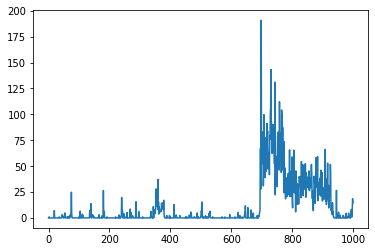

In [45]:
X_v, Z_v = model_vietnam3.sample(1000)
plt.plot(X_v)

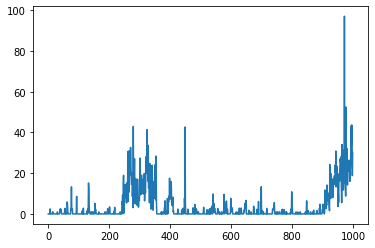

In [46]:
X_v, Z_v = model_vietnam3.sample(1000)
plt.plot(X_v)

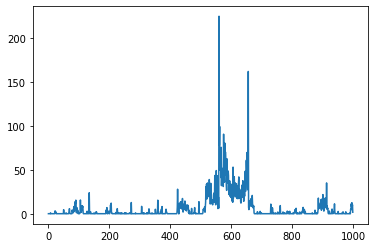

In [47]:
X_v, Z_v = model_vietnam3.sample(1000)
plt.plot(X_v)

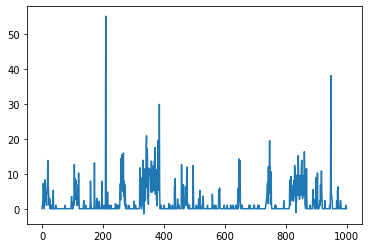

In [48]:
X_v, Z_v = model_vietnam3.sample(1000)
plt.plot(X_v)

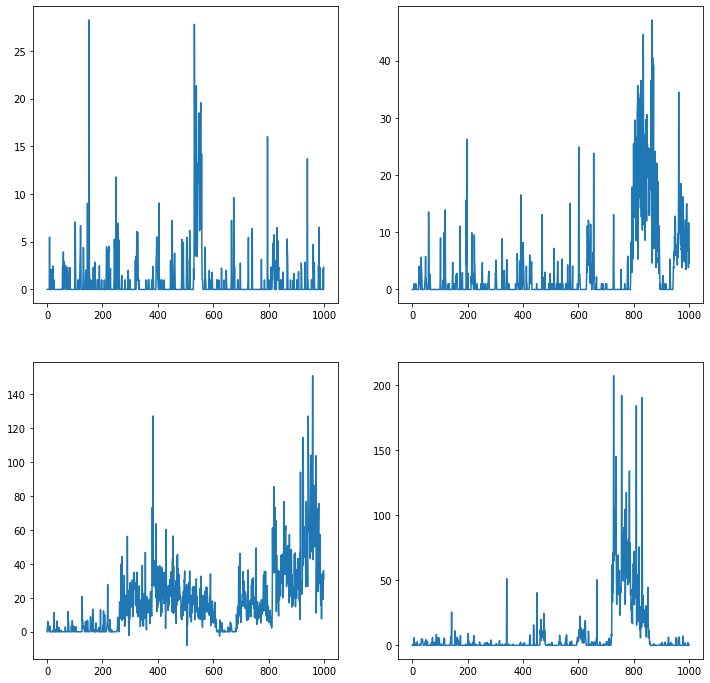

In [56]:
fig, axs = plt.subplots(2,2, figsize=(12,12))
for i in range(2):
    for j in range(2):
        X_v, Z_v = model_vietnam3.sample(1000)
        axs[i,j].plot(X_v)
#plt.show()
plt.savefig("hmm20.svg")

In [55]:
model_vietnam3.score(death_arr.reshape(-1,1))

2533.121070878704

In [57]:
model_vietnam3.means_

array([[  9.59425391],
       [  0.        ],
       [ 33.59288102],
       [ 21.45157586],
       [246.        ],
       [ 11.80229194],
       [165.49523107],
       [  2.30004261],
       [ 68.02707819],
       [ 23.56658559],
       [ 55.60317239],
       [  5.97614833],
       [  1.        ],
       [ 51.15932285],
       [194.00016927],
       [  4.56768365],
       [ 29.81440495],
       [ 33.93097389],
       [ 13.37493173],
       [117.60035609]])

In [60]:
model_vietnam3.transmat_.diagonal()

array([5.43055936e-02, 8.53358320e-01, 9.03320232e-01, 8.85711681e-01,
       0.00000000e+00, 6.18298847e-01, 0.00000000e+00, 1.59867099e-01,
       8.74060618e-01, 8.69669215e-01, 1.30619390e-01, 6.63459942e-01,
       1.95829605e-01, 8.84324163e-01, 0.00000000e+00, 3.15053789e-01,
       5.27657138e-43, 3.94809247e-10, 7.96988497e-01, 2.74014538e-01])

In [62]:
model_vietnam3.covars_.ravel()

array([1.21353029e+01, 4.38327362e-06, 1.08068218e+02, 6.20328901e+01,
       1.00000004e-02, 2.23606277e+01, 2.02792069e+01, 2.13555834e-01,
       3.12851333e+02, 5.72963168e+01, 3.55803366e+02, 5.51327070e+00,
       2.84002213e-05, 2.86316747e+02, 1.16675871e+02, 2.52234383e+00,
       2.02896103e+02, 1.30764239e+02, 2.28028043e+01, 2.54885031e+02])

In [66]:
model_vietnam3.transmat_.sum(axis=0)

array([0.25052696, 2.43458715, 1.15707178, 1.08101197, 0.01515894,
       1.10480619, 0.01057916, 0.69781263, 1.77384516, 1.94508847,
       0.2709077 , 1.59494551, 1.02525473, 1.43823675, 0.0267594 ,
       1.47140107, 0.06020248, 0.23166741, 1.52253882, 1.88759773])

In [67]:
model_vietnam3.transmat_.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [69]:
M = model_vietnam3.transmat_
for i in range(10):
    M = M @ M

In [76]:
np.ones(20)/20 @ M 

array([9.90195680e-03, 4.34084972e-01, 6.04143065e-02, 5.25890253e-02,
       1.92955343e-04, 3.62199592e-02, 3.85541039e-04, 4.08438088e-02,
       1.27282505e-02, 6.96990667e-02, 1.00024411e-02, 4.32938602e-02,
       6.70369733e-02, 3.64418773e-02, 5.77702259e-04, 3.88109996e-02,
       2.77323437e-03, 1.31919394e-02, 6.80346449e-02, 2.77648540e-03])

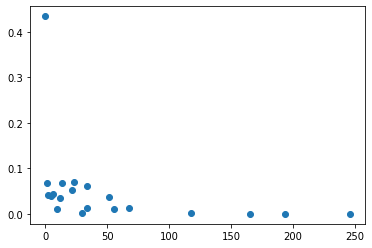

In [79]:
plt.plot(model_vietnam3.means_.ravel(), np.ones(20)/20 @ M, 'o')
plt.savefig("mean_vs_prob.svg")

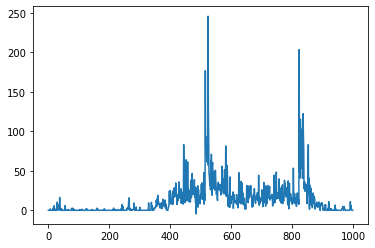

In [81]:
X_v, Z_v = model_vietnam3.sample(1000)
plt.plot(X_v)


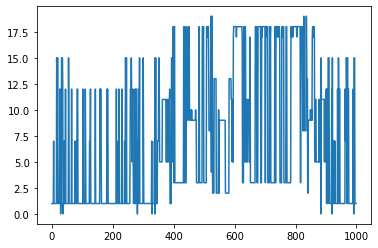

In [82]:
plt.plot(Z_v)

In [84]:
np.where(model_vietnam3.means_.ravel()>100)

(array([ 4,  6, 14, 19], dtype=int64),)

In [86]:
np.where(Z_v ==4)

(array([524], dtype=int64),)

In [87]:
np.where(Z_v ==6)

(array([], dtype=int64),)

In [88]:
np.where(Z_v ==14)

(array([515, 823], dtype=int64),)

In [89]:
np.where(Z_v ==19)

(array([522, 525, 526, 827, 835, 836], dtype=int64),)

In [90]:
plt.text?

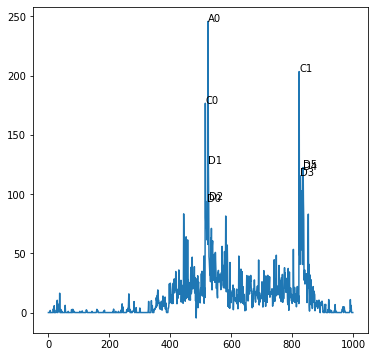

In [96]:
#X_v, Z_v = model_vietnam3.sample(1000)
plt.figure(figsize=(6,6))
plt.plot(np.arange(1000), X_v)
cls_indexs = np.where(model_vietnam3.means_.ravel()>100)[0]
for cls_index, base_label in zip(cls_indexs, 'ABCDEFGHIJKLMN'):
    idxs = np.where(Z_v == cls_index)[0]
    for idx,i in zip(idxs,range(len(idxs))):
        plt.text(idx, X_v[idx], base_label+str(i))
plt.savefig("label.svg")